# Sparse evolution 2D notebook demo

This notebook is an interactive tutorial about how to use the Sparse Evolution deconvolution algorithm in 2D

## Simple example

Bellow an example of how to run ATLAS

In [2]:
import sys
sys.path.append('../../allgo')

import allgo as ag
print(ag.__version__)
print(ag.__file__)

import imageio
import matplotlib.pyplot as plt
from ipywidgets import interact_manual

import ntpath
from IPython.display import clear_output

0.3.0
../../allgo/allgo/__init__.py


## Load the data

In this section we load the data and display it in a interactive viewer

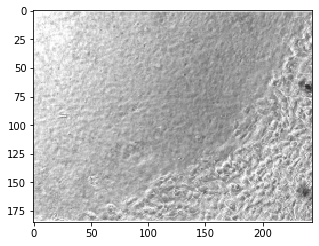

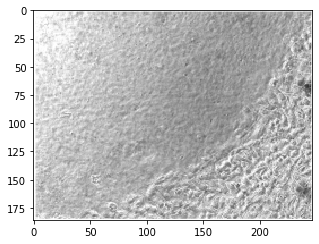

In [3]:
# visualize input image
input_image_path1 = '../Data/opticalflow1.tif'
input_image1 = imageio.imread(input_image_path1)
plt.figure(figsize = (5,20))
plt.imshow(input_image1,cmap='gist_gray')

input_image_path2 = '../Data/opticalflow2.tif'
input_image2 = imageio.imread(input_image_path2)
plt.figure(figsize = (5,20))
plt.imshow(input_image2,cmap='gist_gray')

## Connection to Allgo 

In [4]:
allgo = ag.Allgo(None) # type your token here if you have one

## Interactive parameters selection

In [11]:
# Interactive parameters selection
output_image = None
def run_opticalflow(regularization, gradient):
    global output_image

    input_basename1 = ntpath.basename(input_image_path1)
    input_basename2 = ntpath.basename(input_image_path2)

    files = [ input_image_path1, input_image_path2 ]
    params = '-coeff_reg ' + str(regularization) + ' -coeff_grad ' + str(gradient) + " -f1 " + str(input_basename1) + " -f2 " + str(input_basename2) + " -o" + str(" .")
    out_dict1 = allgo.run_job('Opticalflow', files = files, params = params)
    job_id = out_dict1['id']
    print(out_dict1)
    #job_id = list(out_dict1.keys())[0]
    #if job_id == 'status':
    #    job_id = list(out_dict1.keys())[1]
    print("job_id=", job_id)
    #filepath = allgo.download_file(job_id, 'output.tif', outdir = "../Output" , force = True)
    #print(filepath)
    #output_image = imageio.imread(filepath)

    #clear_output()
    #plt.figure(figsize = (10,80))
    #plt.subplot(1, 3, 1)                      
    #plt.imshow(input_image1,cmap = "gist_gray")
    #plt.subplot(1, 3, 2)
    #plt.imshow(input_image2,cmap = "gist_gray")
    #plt.subplot(1, 3, 3)
    #plt.imshow(output_image,cmap = "gist_gray")
    #plt.show()
    
interact_manual(run_opticalflow, regularization = (1,22) , gradient = (0.1, 0.9, 0.1))


interactive(children=(IntSlider(value=11, description='regularization', max=22, min=1), FloatSlider(value=0.5,…

<function __main__.run_opticalflow(regularization, gradient)>